In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
blue, orange, green, red, *rest = sns.color_palette()

In [56]:
cols=('py_version', 'jf_version', 'implementation', 'function', 'time')
df = pd.read_csv('timedruns.csv', names=cols)
#pivoted = df.pivot_table(index=['function'], columns=['implementation'])

<Axes: xlabel='time', ylabel='function'>

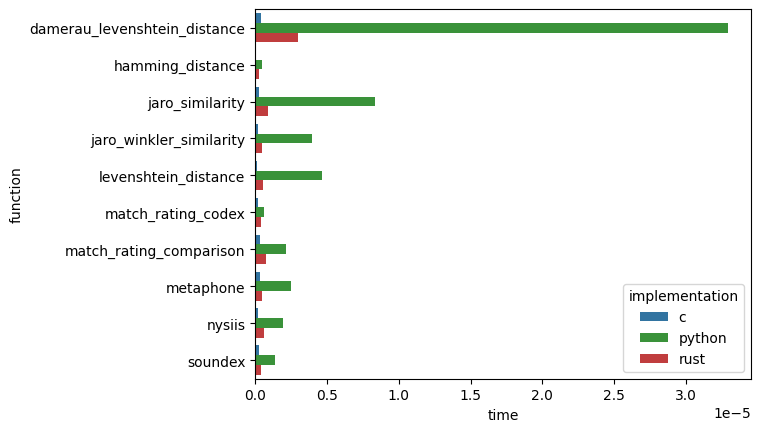

In [57]:
colors = {"python": green, "c" : blue, "rust": red}

sns.barplot(y='function', x='time', hue='implementation', data=df, palette=colors)
# turn the labels 90 degrees

Text(0.5, 0, 'time (log scale)')

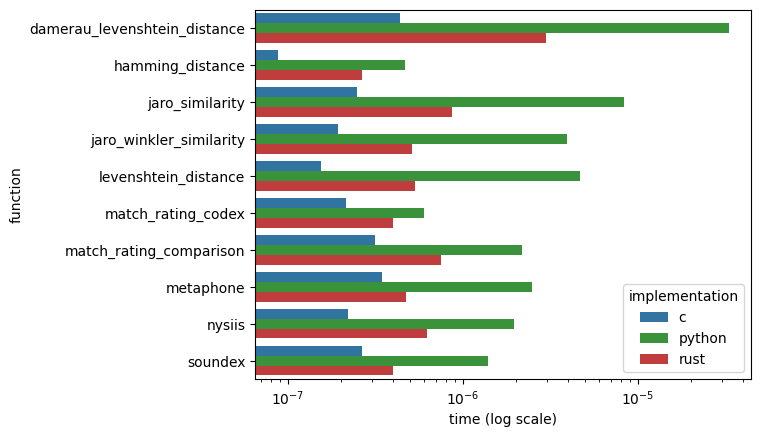

In [58]:
# log scale same plot
sns.barplot(y='function', x='time', hue='implementation', data=df, palette=colors)
plt.xscale('log')
plt.xlabel('time (log scale)')

In [59]:
pivoted = df.pivot_table(index=['function'], columns=['implementation'], values='time')
pivoted['python/c'] = pivoted['python'] / pivoted['c']
pivoted['rust/c'] = pivoted['python'] / pivoted['rust']
pivoted['rust/python'] = pivoted['rust'] / pivoted['python']
pivoted["c"] *= 100000 # multiply by 100000 to get time in microseconds
pivoted["python"] *= 100000
pivoted["rust"] *= 100000
pivoted


implementation,c,python,rust,python/c,rust/c,rust/python
function,,,,,,
damerau_levenshtein_distance,0.043844,3.289454,0.296865,75.025670,11.080637,0.090248
hamming_distance,0.008722,0.046529,0.026441,5.334908,1.759755,0.568261
jaro_similarity,0.024690,0.831646,0.086272,33.683493,9.639818,0.103736
jaro_winkler_similarity,0.019181,0.392573,0.051057,20.466952,7.688976,0.130056
levenshtein_distance,0.015507,0.465188,0.053257,29.999158,8.734797,0.114485
match_rating_codex,0.021556,0.059770,0.039871,2.772765,1.499091,0.667071
match_rating_comparison,0.031344,0.215691,0.074495,6.881499,2.895385,0.345377
metaphone,0.034497,0.247509,0.047370,7.174855,5.225045,0.191386
nysiis,0.022129,0.195079,0.062024,8.815730,3.145225,0.317942


Text(0.5, 0, 'Ratio (X times slower than C) \n (lower is better)')

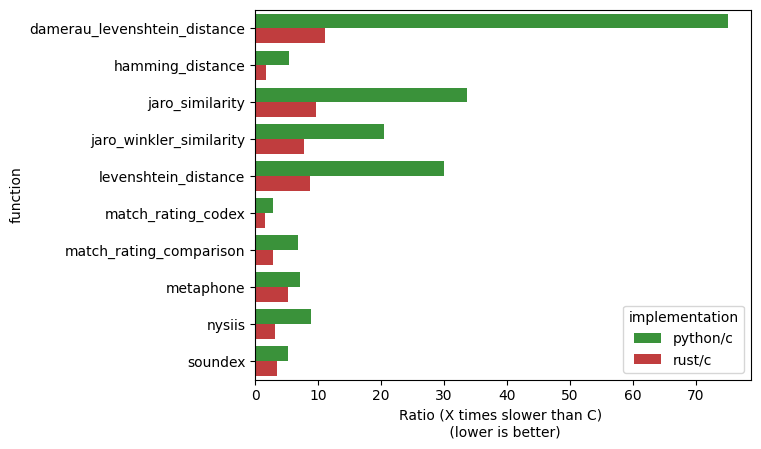

In [61]:
# convert back to long format
df = pivoted.reset_index()
df = pd.melt(df, id_vars=['function'], value_vars=["python/c", "rust/c"])
sns.barplot(x='value', y='function', hue="implementation", data=df, palette=[green, red])
# to add a label to the x axis
plt.xlabel("Ratio (X times slower than C) \n (lower is better)")
#sns.barplot(x='function', y='value', data=df)